## Pandas

In [6]:
import pandas as pd

pd.set_option('display.max_colwidth', -1)

In [8]:
#reading the file using pandas

%time df = pd.read_csv("employee_email_data_v2.csv", usecols=["event_id", "tag", "user_ids", "hour"])

df.head()

CPU times: user 1.46 s, sys: 157 ms, total: 1.61 s
Wall time: 1.63 s


,event_id,tag,user_ids,hour
0,gse:161a4c6b24541287,to,user_out_0,17
1,gse:161a4c6b24541287,from,user_1,17
2,gse:161a5923feab3c3a,to,user_2,21
3,gse:161a4c6b9dd49868,from,user_1,17
4,gse:161a4c6b6b9a82f0,to,user_out_3,17


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1422907 entries, 0 to 1422906
Data columns (total 4 columns):
event_id    1422907 non-null object
tag         1422907 non-null object
user_ids    1422907 non-null object
hour        1422907 non-null int64
dtypes: int64(1), object(3)
memory usage: 43.4+ MB


In [10]:
df.tag.value_counts()

to      950060
from    472847
Name: tag, dtype: int64

In [11]:
def get_calculated_col (row):
    
    if "out" in row["user_ids"]:
        txt_1 = row["user_ids"].replace("out_","").replace ("_"," ") + " who is working for another company"
    
    else:
        txt_1 = row["user_ids"].replace("_"," ") + " who is working for our company"
        
    if row["tag"] == "from":
        txt_2 = " sent an email"
        
    elif row["tag"] == "to":
        txt_2 = " received an email"
        
    if row["hour"] > 17 or row["hour"]< 9:
        txt_3 = " between 6 pm and 9 am"
    else:
        txt_3 = " during work hours"
        
    return txt_1 + txt_2 + txt_3

In [12]:
df.sample(10).apply(get_calculated_col, axis=1)

949738     user 45 who is working for our company received an email between 6 pm and 9 am      
1059622    user 31 who is working for our company received an email between 6 pm and 9 am      
982112     user 17 who is working for our company received an email between 6 pm and 9 am      
348938     user 2 who is working for our company received an email between 6 pm and 9 am       
115368     user 93 who is working for our company received an email between 6 pm and 9 am      
744366     user 7198 who is working for another company received an email between 6 pm and 9 am
210453     user 169 who is working for our company received an email between 6 pm and 9 am     
32162      user 39 who is working for our company received an email during work hours          
363302     user 365 who is working for our company received an email between 6 pm and 9 am     
47331      user 115 who is working for our company received an email between 6 pm and 9 am     
dtype: object

In [88]:
%%time

df["comment"] = df.apply(get_calculated_col, axis=1)


CPU times: user 1min 14s, sys: 1.72 s, total: 1min 16s
Wall time: 1min 16s


In [89]:
df.head()

,event_id,tag,user_ids,hour,comment
0,gse:161a4c6b24541287,to,user_out_0,17,user 0 who is working for another company received an email during work hours
1,gse:161a4c6b24541287,from,user_1,17,user 1 who is working for our company sent an email during work hours
2,gse:161a5923feab3c3a,to,user_2,21,user 2 who is working for our company received an email between 6 pm and 9 am
3,gse:161a4c6b9dd49868,from,user_1,17,user 1 who is working for our company sent an email during work hours
4,gse:161a4c6b6b9a82f0,to,user_out_3,17,user 3 who is working for another company received an email during work hours


In [13]:
df_pandas = df

del df

## Dask

In [5]:
# https://www.analyticsvidhya.com/blog/2018/08/dask-big-datasets-machine_learning-python/

In [14]:
#reading the file using dask

import dask.dataframe as dd

%time df = dd.read_csv("employee_email_data_v2.csv", usecols=["event_id", "tag", "user_ids", "hour"])



CPU times: user 12.4 ms, sys: 3.53 ms, total: 16 ms
Wall time: 16.9 ms


In [ ]:
"""
df = dd.read_csv('largefile.csv', blocksize=25e6)  # 25MB chunks  
blocksize:str, int or None, optional
Number of bytes by which to cut up larger files. Default value is computed based on available physical memory and the number of cores.

It can read CSV files from external resources (e.g. S3, HDFS) by providing a URL:

>>> df = dd.read_csv('s3://bucket/myfiles.*.csv')  
>>> df = dd.read_csv('hdfs:///myfiles.*.csv')  
>>> df = dd.read_csv('hdfs://namenode.example.com/myfiles.*.csv')  

"""

In [15]:
# will take a little bit longer

%time df.head()

CPU times: user 1.1 s, sys: 197 ms, total: 1.29 s
Wall time: 1.3 s


,event_id,tag,user_ids,hour
0,gse:161a4c6b24541287,to,user_out_0,17
1,gse:161a4c6b24541287,from,user_1,17
2,gse:161a5923feab3c3a,to,user_2,21
3,gse:161a4c6b9dd49868,from,user_1,17
4,gse:161a4c6b6b9a82f0,to,user_out_3,17


In [16]:
# convert from pandas dataframe that's already loaded into memory

%time df_dask = dd.from_pandas(df_pandas, npartitions=8)   # where the number of partitions is the number of cores you want to use


CPU times: user 243 ms, sys: 17.8 ms, total: 261 ms
Wall time: 261 ms


In [17]:
%%time

df_dask["comment"] = df_dask.apply(lambda x: get_calculated_col(x), meta=('str'), axis=1).compute(scheduler='multiprocessing')


CPU times: user 22 s, sys: 2.59 s, total: 24.6 s
Wall time: 31.9 s


In [18]:
df_dask.head()

,event_id,tag,user_ids,hour,comment
0,gse:161a4c6b24541287,to,user_out_0,17,user 0 who is working for another company received an email during work hours
1,gse:161a4c6b24541287,from,user_1,17,user 1 who is working for our company sent an email during work hours
2,gse:161a5923feab3c3a,to,user_2,21,user 2 who is working for our company received an email between 6 pm and 9 am
3,gse:161a4c6b9dd49868,from,user_1,17,user 1 who is working for our company sent an email during work hours
4,gse:161a4c6b6b9a82f0,to,user_out_3,17,user 3 who is working for another company received an email during work hours


In [83]:
# DASK ML

# https://tomaugspurger.github.io/slides/scalable-ml.pdf


### Dask ML

Dask ML provides scalable machine learning algorithms in python which are compatible with scikit-learn. Let us first understand how scikit-learn handles the computations and then we will look at how Dask performs these operations differently.


A user can perform parallel computing using scikit-learn (on a single machine) by setting the parameter njobs = -1. Scikit-learn uses Joblib to perform these parallel computations. Joblib is a library in python that provides support for parallelization. When you call the .fit() function, based on the tasks to be performed (whether it is a hyperparameter search or fitting a model), Joblib distributes the task over the available cores. 

And this feature depends on the learning algorithm; some can be parallelized, some can't. Ccheck in the documentation if the implementation of the estimator class you are using has a `n_jobs` parameter.

However, even if the estimator itself doesn't support parallelization, you can still take advantage of multiple CPUs/cores in k-fold cross-validation and GridSearch (the parameter there is `n_jobs` as well). Note that this approaches uses multithreading  (if the data is > 1Mb in memory) to avoid making unnecessary copies of your dataset that could max out your memory.

**What about Dask ML ?**

Even though parallel computations can be performed using scikit-learn, it cannot be scaled to multiple machines. On the other hand, Dask works well on a single machine and can also be scaled up to a cluster of machines.

Dask has a central task scheduler and a set of workers. The scheduler assigns tasks to the workers. Each worker is assigned a number of cores on which it can perform computations. The workers provide two functions:

    -compute tasks as assigned by the scheduler
    -serve results to other workers on demand
    
Below is an example that explains how a conversation between a scheduler and workers looks like (this has been given by one of the developers of Dask, Matthew Rocklin):

The central task scheduler sends jobs (python functions) to lots of worker processes, either on the same machine or on a cluster:

    -Worker A, please compute x = f(1), Worker B please compute y = g(2)
    -Worker A, when g(2) is done please get y from Worker B and compute z = h(x, y)

#### 1. Parallelize Scikit-Learn Directly

As we have seen previously, sklearn provides parallel computing (on a single CPU) using Joblib. In order to parallelize multiple sklearn estimators, you can directly use Dask by adding a few lines of code (without having to make modifications in the existing code).

The first step is to import client from dask.distributed. This command will create a local scheduler and worker on your machine.

In [19]:
from dask.distributed import Client 

client = Client() # start a local Dask client

# the long version:

# cluster = LocalCluster()
# or cluster = LocalCluster("127.0.0.1:8786", workers=8, ncores=8)
# client = Client(cluster)

# http://docs.dask.org/en/latest/setup/single-distributed.html

/anaconda3/lib/python3.6/site-packages/distributed/bokeh/core.py:13: UserWarning: 
Dask needs bokeh >= 0.13.0 for the dashboard.
Continuing without the dashboard.
  warnings.warn("\nDask needs bokeh >= 0.13.0 for the dashboard."


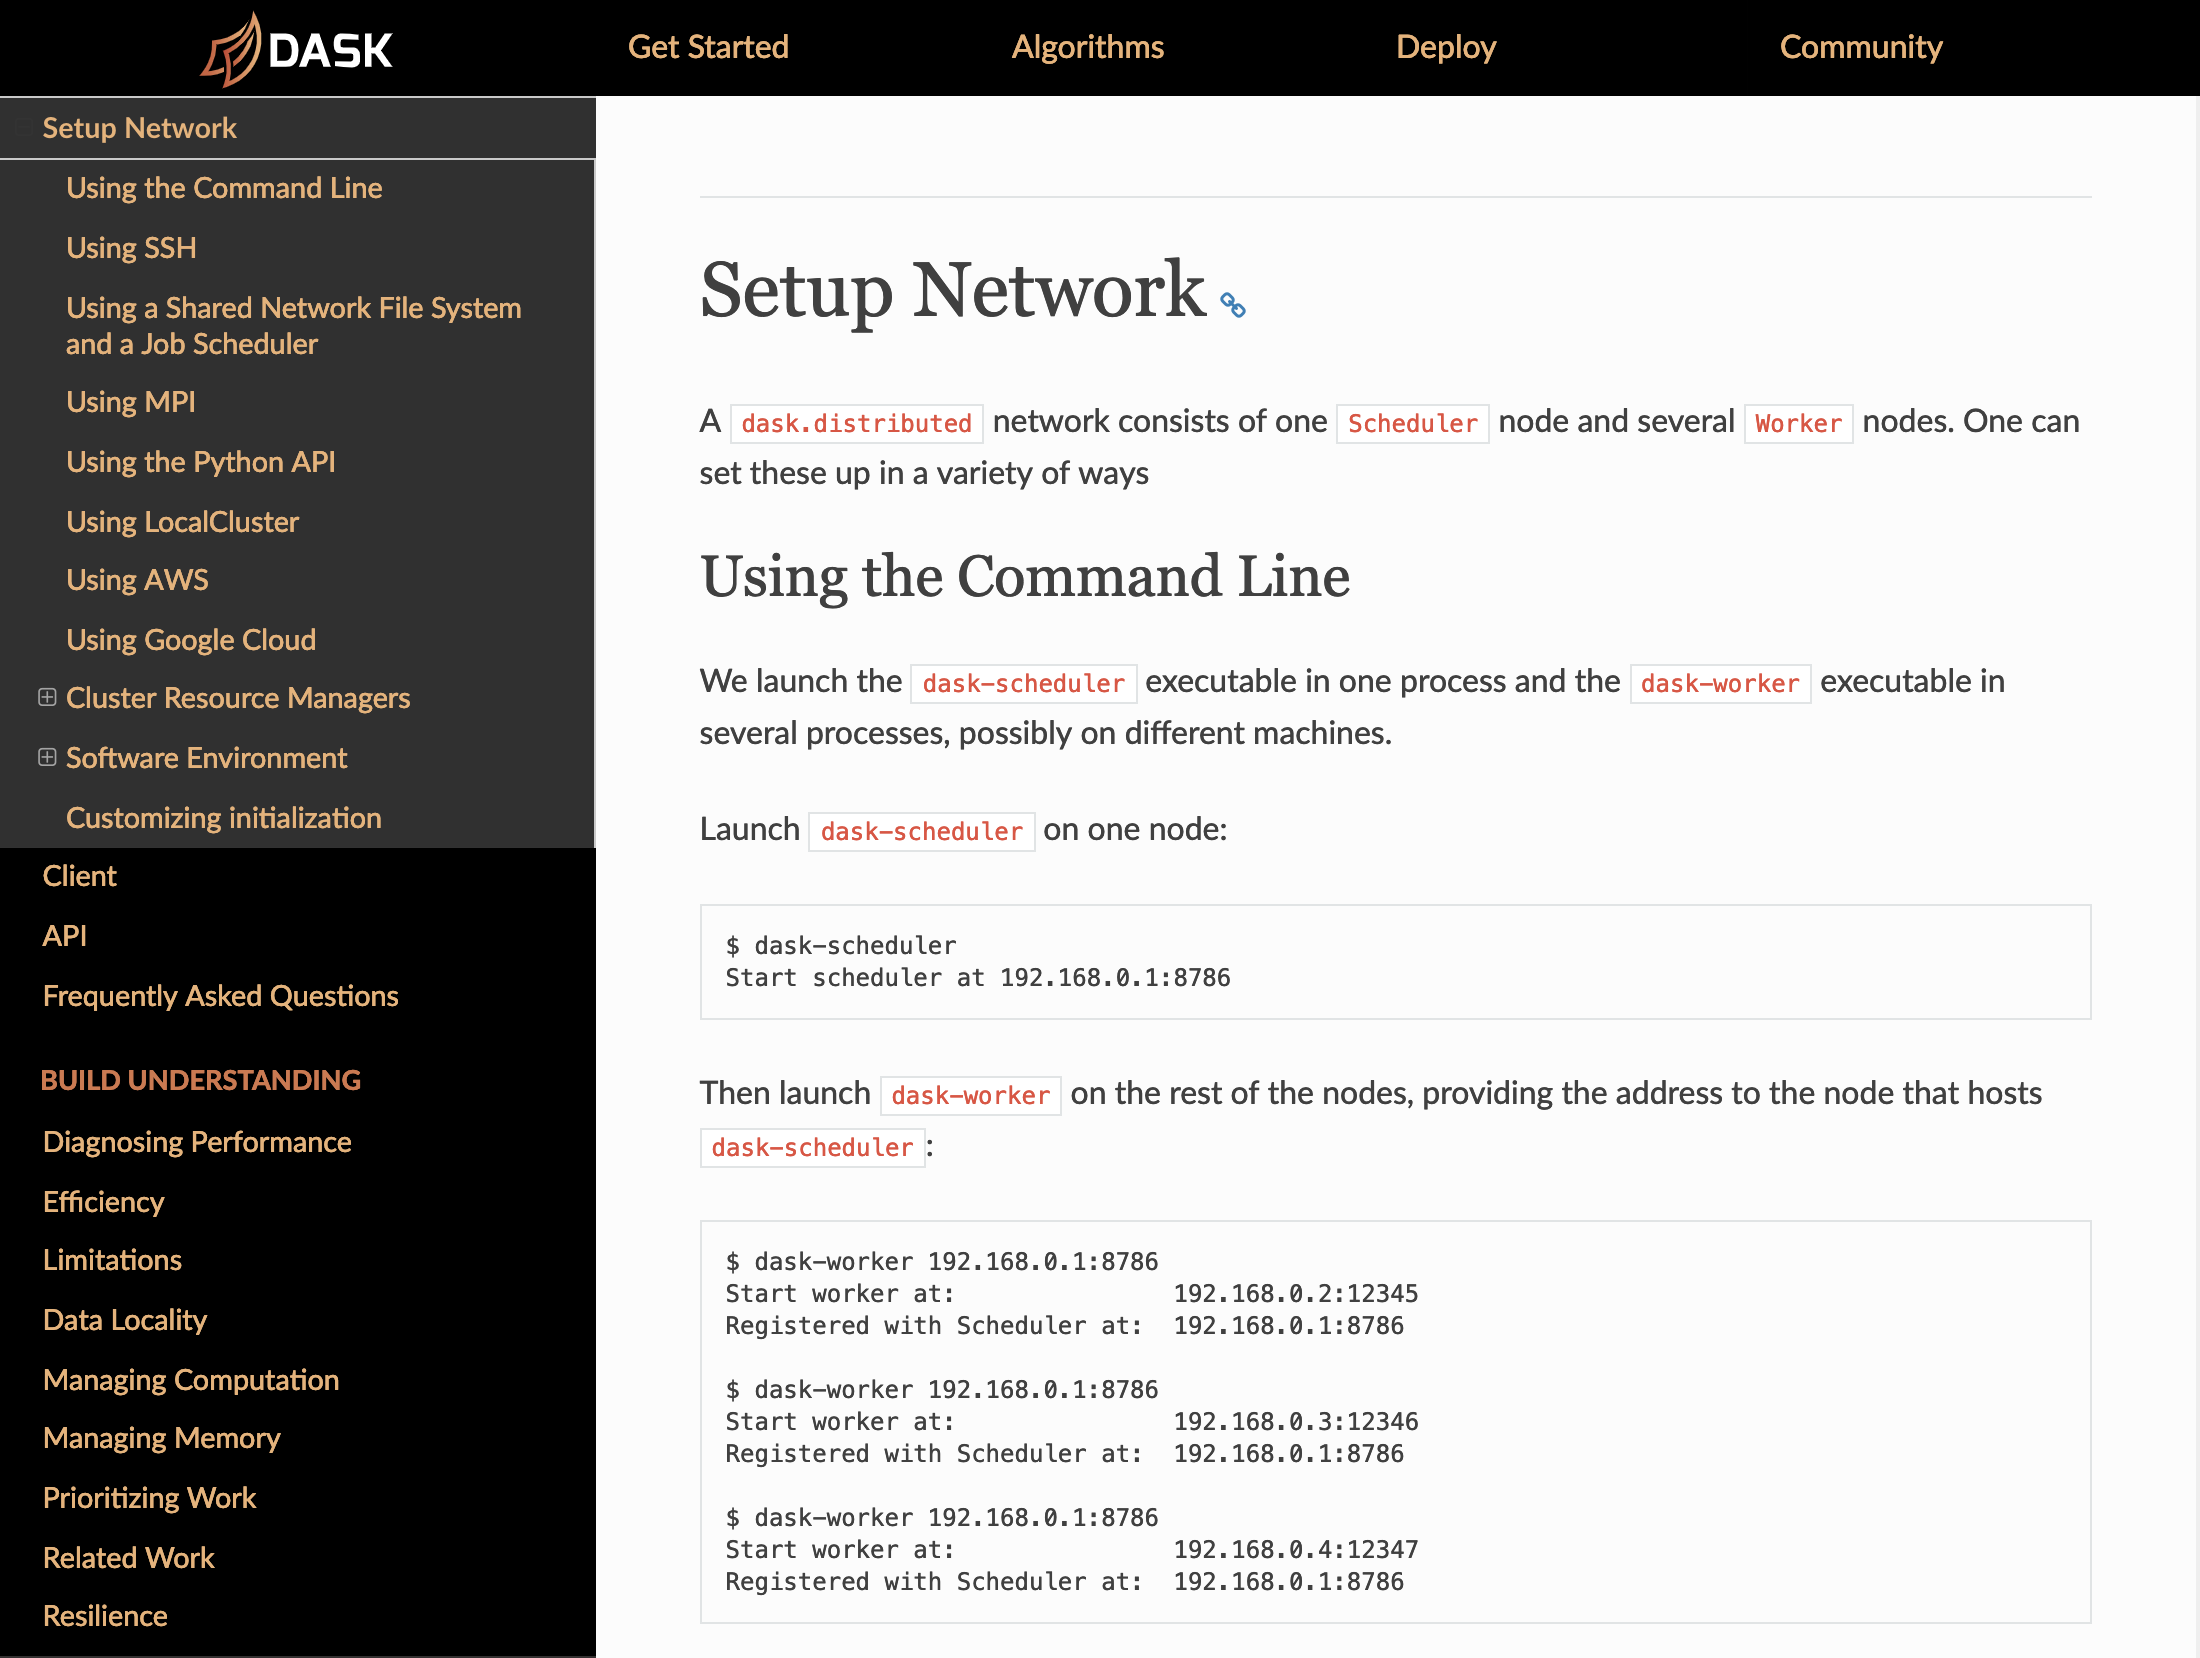

In [ ]:
# The next step will be to instantiate dask joblib in the backend. 
# You need to import parallel_backend from sklearn joblib

import dask_ml.joblib
from sklearn.externals.joblib import parallel_backend
with parallel_backend('dask'):
    # Your normal scikit-learn code here
    from sklearn.ensemble import RandomForestClassifier 
    model = RandomForestClassifier()
    

#### 2. Reimplement Algorithms with Dask Array

For simple machine learning algorithms which use Numpy arrays, Dask ML re-implements these algorithms. Dask replaces numpy arrays with Dask arrays to achieve scalable algorithms. This has been implemented for:

Linear models (linear regression, logistic regression, poisson regression)
Pre-processing (scalers , transforms)
Clustering (k-means, spectral clustering)

In [20]:
# Linear model example

from dask_ml.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(data, labels)

NameError: name 'data' is not defined

In [ ]:
# Pre-processing example

from dask_ml.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=True)
result = encoder.fit(data)

In [ ]:
# Clustering example

from dask_ml.cluster import KMeans
model = KMeans()
model.fit(data)

##### Implementation :

In [21]:
#reading the csv files
import dask.dataframe as dd
df = dd.read_csv('train.csv')
test = dd.read_csv("test.csv")

#having a look at the head of the dataset
df.head()


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [22]:

#finding the null values in the dataset
df.isnull().sum().compute()


User_ID                       0     
Product_ID                    0     
Gender                        0     
Age                           0     
Occupation                    0     
City_Category                 0     
Stay_In_Current_City_Years    0     
Marital_Status                0     
Product_Category_1            0     
Product_Category_2            173638
Product_Category_3            383247
Purchase                      0     
dtype: int64

In [23]:

#defining the data and target
categorical_variables = df[['Gender', 'Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status']]
target = df['Purchase']

#creating dummies for the categorical variables
data = dd.get_dummies(categorical_variables.categorize()).compute()

#converting dataframe to array
datanew=data.values

#fit the model
from dask_ml.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(datanew, target)

#preparing the test data
test_categorical = test[['Gender', 'Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status']]
test_dummy = dd.get_dummies(test_categorical.categorize()).compute()
testnew = test_dummy.values

#predict on test and upload
pred=lr.predict(testnew)


In [24]:
pred

array([7911.62544111, 9101.05308994, 8972.23417733, ..., 8939.70251971,
       9400.51898846, 8514.05449281])

In [ ]:
from dask.distributed import Client
client = Client() # start a local Dask client

import dask_ml.joblib
from sklearn.externals.joblib import parallel_backend


with parallel_backend('dask'):

    # Create the parameter grid based on the results of random search 
    param_grid = {
    'bootstrap': [True],
    'max_depth': [8, 9],
    'max_features': [2, 3],
    'min_samples_leaf': [4, 5],
    'min_samples_split': [8, 10],
    'n_estimators': [100, 200]
    }

    # Create a based model
    from sklearn.ensemble import RandomForestRegressor
    rf = RandomForestRegressor()

In [ ]:
# Instantiate the grid search model
import dask_searchcv as dcv
grid_search = dcv.GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3)
grid_search.fit(data, target)
grid_search.best_params_


## PySpark

In [1]:
from pyspark import SparkContext
from pyspark.sql import SQLContext, SparkSession
import warnings

ss = SparkSession.builder.appName('SDDM').master("local[*]").getOrCreate()

In [2]:
df_spark = ss.read.csv("employee_email_data_v2.csv", 
                    header=True, inferSchema=True)

In [3]:
from pyspark.sql.types import StringType
from pyspark.sql.functions import udf
from pyspark.sql import functions as f

In [4]:
def generate_udf():
    
    def spark_func(user, tag, hour):

        if "out" in user:
            txt_1 = user.replace("out_","").replace ("_"," ") + " who is working for another company"

        else:
            txt_1 = user.replace("_"," ") + " who is working for our company"

        if tag == "from":
            txt_2 = " sent an email"

        elif tag == "to":
            txt_2 = " received an email"

        if hour > 17 or hour < 9:
            txt_3 = " between 6 pm and 9 am"
        else:
            txt_3 = " during work hours"

        return txt_1 + txt_2 + txt_3
    
    return f.udf(spark_func, StringType())


In [5]:
%%time 

df_spark = df_spark.withColumn('comment', 
                   generate_udf()(f.col('user_ids'), f.col('tag'), f.col('hour')))

df_spark.collect()

CPU times: user 13.1 s, sys: 728 ms, total: 13.8 s
Wall time: 21 s


In [6]:
df_spark.show(5, False)

+--------------------+-------------------+----+----------+----+-----------------------------------------------------------------------------+
|event_id            |event_time         |tag |user_ids  |hour|comment                                                                      |
+--------------------+-------------------+----+----------+----+-----------------------------------------------------------------------------+
|gse:161a4c6b24541287|2018-02-17 17:18:59|to  |user_out_0|17  |user 0 who is working for another company received an email during work hours|
|gse:161a4c6b24541287|2018-02-17 17:18:59|from|user_1    |17  |user 1 who is working for our company sent an email during work hours        |
|gse:161a5923feab3c3a|2018-02-17 21:01:20|to  |user_2    |21  |user 2 who is working for our company received an email between 6 pm and 9 am|
|gse:161a4c6b9dd49868|2018-02-17 17:18:59|from|user_1    |17  |user 1 who is working for our company sent an email during work hours        |
|gse:1

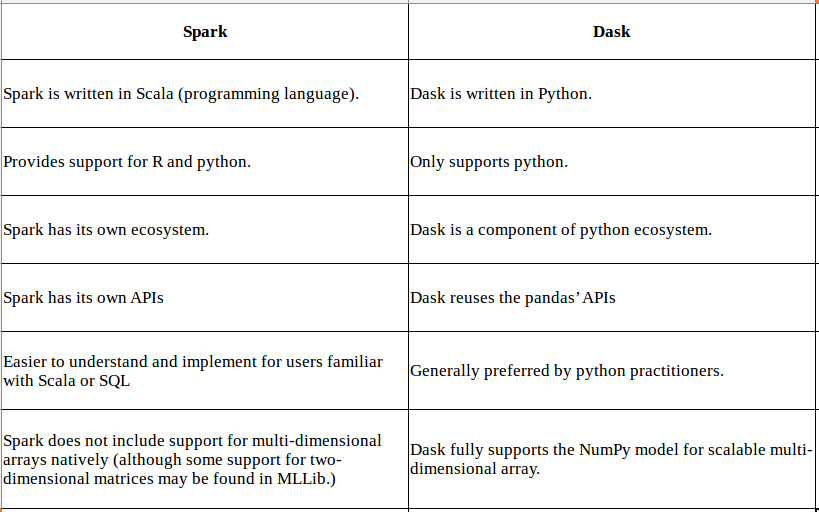

### PySpark ML

In [4]:
# https://towardsdatascience.com/building-a-linear-regression-with-pyspark-and-mllib-d065c3ba246a

In [7]:
df_spark = ss.read.csv('train.csv', 
                    header=True, inferSchema=True)

In [8]:
df_spark.take(5)

[Row(User_ID=1000001, Product_ID='P00069042', Gender='F', Age='0-17', Occupation=10, City_Category='A', Stay_In_Current_City_Years='2', Marital_Status=0, Product_Category_1=3, Product_Category_2=None, Product_Category_3=None, Purchase=8370),
 Row(User_ID=1000001, Product_ID='P00248942', Gender='F', Age='0-17', Occupation=10, City_Category='A', Stay_In_Current_City_Years='2', Marital_Status=0, Product_Category_1=1, Product_Category_2=6, Product_Category_3=14, Purchase=15200),
 Row(User_ID=1000001, Product_ID='P00087842', Gender='F', Age='0-17', Occupation=10, City_Category='A', Stay_In_Current_City_Years='2', Marital_Status=0, Product_Category_1=12, Product_Category_2=None, Product_Category_3=None, Purchase=1422),
 Row(User_ID=1000001, Product_ID='P00085442', Gender='F', Age='0-17', Occupation=10, City_Category='A', Stay_In_Current_City_Years='2', Marital_Status=0, Product_Category_1=12, Product_Category_2=14, Product_Category_3=None, Purchase=1057),
 Row(User_ID=1000002, Product_ID='P0

In [ ]:
from pyspark.ml.regression import LinearRegression

lr = LinearRegression(featuresCol = 'features', labelCol='MV', maxIter=10, regParam=0.3, elasticNetParam=0.8)

lr_model = lr.fit(train_df)
print("Coefficients: " + str(lr_model.coefficients))
print("Intercept: " + str(lr_model.intercept))


trainingSummary = lr_model.summary
print("RMSE: %f" % trainingSummary.rootMeanSquaredError)
print("r2: %f" % trainingSummary.r2)


lr_predictions = lr_model.transform(test_df)
lr_predictions.select("prediction","MV","features").show(5)
from pyspark.ml.evaluation import RegressionEvaluator
lr_evaluator = RegressionEvaluator(predictionCol="prediction", \
                 labelCol="MV",metricName="r2")
print("R Squared (R2) on test data = %g" % lr_evaluator.evaluate(lr_predictions))

predictions = lr_model.transform(test_df)
predictions.select("prediction","MV","features").show()
